Many people know that there are homeless people because they see them begging for money on the side of the road. The following is going to show that homelessness is a much bigger problem than most people realize. Looking at the United States, I realized that Most of the highly populated states have a huge homeless problem. In 2018, California alone had around 130,000 homeless people which makes up approximately 24% of its population. That same year, New York had 91,897 homeless people which makes up approximately 17% of its population. Then you have Florica who had approximately 31,000 homeless people which only makes up approximately 6% of their population. One would think they have a high homeless population, but when you compare it to Florida's population, it doesn't seem as high. Washington State is the same way. They have approximately 22,000 homeless people, but that only makes up approximately 4% of their population. 

Some states have not done much about their homelessness which can be seen by the chart below, but most states have reduced their homelessness. The United States as a whole starts as a dark red color and as the chart goes through the years, the United States as a whole becomes a light red color. 

Colorado is one of the states that have reduced their homelesssness. In 2010, Colorado has more than 13,500 homeless people and fluctuates between the range of 6,001 to 9,900 and the range 9,901 to 13, 500. Although this does not seem like a significant reduction, this is significant because of the population growth that Colorado has seen since 2010 when this data started. The population of Colorad has increased by approximately 700,000 people. 

import cartopy.crs as ccrs

import cartopy.io.shapereader as shpreader

import matplotlib.pyplot as plt

import matplotlib as mpl

import numpy as np

import matplotlib.patches as mpatches

import csv

import matplotlib.animation as animation


c = np.arange(1, 10)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())

cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.Reds)

cmap.set_array([])

fig = plt.figure()

ax = plt.axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-160, -72, 20, 72], ccrs.Geodetic())

shapeName = 'admin_1_states_provinces_lakes_shp'

states_shp = shpreader.natural_earth(resolution='110m', category='cultural',
    name=shapeName)

animationYear = 2010

animationTitle = ax.text(0.55, 0.95, "", transform=ax.transAxes, ha="center",
    fontsize=22, fontweight='bold')

def getData(fileName):

    years = np.zeros(9)
    data10 = {}
    data11 = {}
    data12 = {}
    data13 = {}
    data14 = {}
    data15 = {}
    data16 = {}
    data17 = {}
    data18 = {}
    percentage10 = {}
    percentage11 = {}
    percentage12 = {}
    percentage13 = {}
    percentage14 = {}
    percentage15 = {}
    percentage16 = {}
    percentage17 = {}
    percentage18 = {}

    with open(fileName, 'r') as fil:
        data = csv.DictReader(fil, delimiter=',')

        for row in data:
            stateName = row['State']
            del (row['State'])
            for year, people in row.items():
                temp = people.split(' ')
                numOfPeople = temp[0]
                percentage = temp[1]
                if year == '2010':
                    years[0] = 2010
                    data10.setdefault(stateName, int(numOfPeople))
                    percentage10.setdefault(stateName, percentage)
                elif year == '2011':
                    years[1] = 2011
                    data11.setdefault(stateName, int(numOfPeople))
                    percentage11.setdefault(stateName, percentage)
                elif year == '2012':
                    years[2] = 2012
                    data12.setdefault(stateName, int(numOfPeople))
                    percentage12.setdefault(stateName, percentage)
                elif year == '2013':
                    years[3] = 2013
                    data13.setdefault(stateName, int(numOfPeople))
                    percentage13.setdefault(stateName, percentage)
                elif year == '2014':
                    years[4] = 2014
                    data14.setdefault(stateName, int(numOfPeople))
                    percentage14.setdefault(stateName, percentage)
                elif year == '2015':
                    years[5] = 2015
                    data15.setdefault(stateName, int(numOfPeople))
                    percentage15.setdefault(stateName, percentage)
                elif year == '2016':
                    years[6] = 2016
                    data16.setdefault(stateName, int(numOfPeople))
                    percentage16.setdefault(stateName, percentage)
                elif year == '2017':
                    years[7] = 2017
                    data17.setdefault(stateName, int(numOfPeople))
                    percentage17.setdefault(stateName, percentage)
                elif year == '2018':
                    years[8] = 2018
                    data18.setdefault(stateName, int(numOfPeople))
                    percentage18.setdefault(stateName, percentage)

    return data10, percentage10, data11, percentage11, data12, percentage12,
        data13, percentage13, data14, percentage14, data15, percentage15,
        data16, percentage16, data17, percentage17, data18, percentage18

def getColor(data):

    global cmap

    if data < 1400:
        faceColor = cmap.to_rgba(2)
    elif data < 6001:
        faceColor = cmap.to_rgba(4)
    elif data < 9901:
        faceColor = cmap.to_rgba(6)
    elif data < 13501:
        faceColor = cmap.to_rgba(8)
    else:
        faceColor = cmap.to_rgba(10)

    return faceColor

def init():                     # init function for the animation
    global cmap
    animate = []

    ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

    for state in shpreader.Reader(states_shp).records():
        edgeColor = 'black'
        animate.append(ax.add_geometries([state.geometry],
            ccrs.LambertConformal, edgeColor=edgeColor))
    animate.append(animationTitle)
    return animate

def update(data):
    global animationYear
    animate = []
    animationTitle.set_text('Homeless People in the U.S. in
        {}'.format(animationYear))

        edgeColor = 'black'

        try:
            stateDens = data[state.attributes['name']]
        except:
            stateDens = 0

        color = getColor(stateDens)
        animate.append(ax.add_geometries([state.geometry], ccrs.PlateCarree(),
            faceColor=color, edgeColor=edgeColor, label=state))

    animate.append(animationTitle)
    animationYear += 1
    if animationYear > 2018:
        animationYear = 2010

    return animate

def show(fileName):

    data10, percentage10, data11, percentage11, data12, percentage12, data13,
        percentage13, data14, percentage14,data15, percentage15, data16,
        percentage16, data17, percentage17, data18, percentage18
    getData(fileName)

    dataSet = [data10, data11, data12, data13, data14, data15, data16, data17,
        data18]
    FRAME_DELTA = 1500
    range1 = mpatches.Rectangle((0, 0), 1, 1, facecolor=cmap.to_rgba(2))
    range2 = mpatches.Rectangle((0, 0), 1, 1, facecolor=cmap.to_rgba(4))
    range3 = mpatches.Rectangle((0, 0), 1, 1, facecolor=cmap.to_rgba(6))
    range4 = mpatches.Rectangle((0, 0), 1, 1, facecolor=cmap.to_rgba(8))
    range5 = mpatches.Rectangle((0, 0), 1, 1, facecolor=cmap.to_rgba(10))

    labels = ['< 1,400', '2,901 - 6,000', '6,001 - 9,900', '9,901 - 13,500', '>
        13,500']

    plt.legend([range1, range2, range3, range4, range5], labels, loc='upper
        left', fancybox=True, bbox_to_anchor=(0, 0.25), fontsize=16)
    ax.outline_patch.set_visible(False)
    ani = animation.FuncAnimation(fig, update, frames=dataSet, init_func=init,
        interval=FRAME_DELTA, blit=True)
    plt.show()

show('homelessMap.csv')


<img src="animatedMap.gif" width="1200" height="1000" />

Although homelessness is getting better, it is still a pretty large problem. If we take a closer look at the city of Denver, we will see that there is still a problem. The first thing that we should look at on the chart below is the number of new homeless people. In 2018, there were 661 new homeless people in Denver. That is approximately 19% of the homeless population in Denver. Nineteen percent of the homeless population became homeless in 2018. That is a pretty large number of new homeless people. We need to look at these people and find out what made them homeless. Preventing new homeless people would be a huge feat in defeating homelessness. 

The next thing to look at on the graph below is the number of families that are homeless. There were 710 families that were homeless in 2018. That is approximately 20% of the homeless population. Can you imagine being a kid living on the streets with your parents thinking that it is normal? I know I couldn't imagine not having a place to sleep or sleeping in a shelter with a bunch of people that you don't know. Having so many homeless families is a good enough reason in itself to want to reduce the number of homeless in Denver. 

Another reason to reduce the homeless population is the number of veterans that are homeless. There are 427 veterans that are homeless. These people risked their lives to fight for this country and we repay them by letting them be homeless. The least we could do is give them a place to live. 



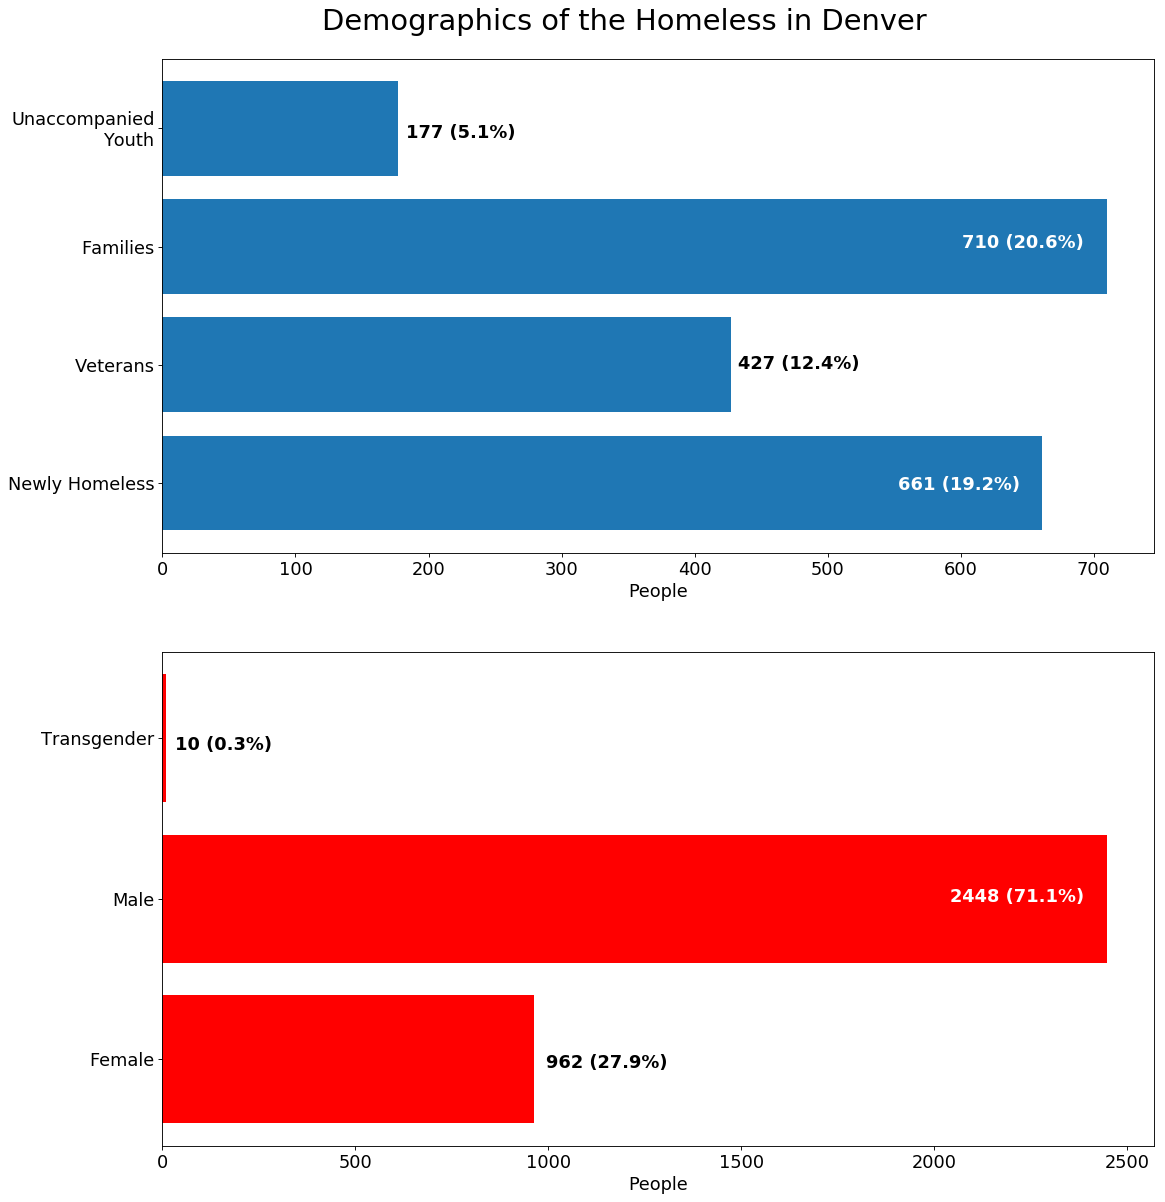

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def getData(fileName):
    graphData = []
    percentageData = []
    category = []
    data = open(fileName, "r")

    for line in data:
        word = line.split(' : ')
        value = word[1].split(' ')
        category.append(word[0])
        graphData.append(int(value[0]))
        percentageData.append(value[1])

    return graphData, percentageData, category

demographicsData, demographicsPercentages, demographicsCategories = getData('denverDemographics.txt')
genderData, genderPercentage, genderCategories = getData('GenderOfHomeless.txt')

demographicsCategories[3] = 'Unaccompanied\nYouth'

fig=plt.figure(figsize=(16, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
y1_pos = np.arange(len(demographicsData))
width = 0.5

graph1 = plt.barh(y1_pos, demographicsData, align='center')
plt.yticks(y1_pos, demographicsCategories, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('People', fontsize=16)
plt.figtext(0.25, 0.9, 'Demographics of the Homeless in Denver', fontsize=26)

plt.subplot(2, 1, 2)
y2_pos = np.arange(len(genderData))

graph2 = plt.barh(y2_pos, genderData,  align='center', color='red')
plt.yticks(y2_pos, genderCategories, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('People', fontsize=16)

plt.figtext(0.7, 0.566, '{} {}'.format(demographicsData[0], demographicsPercentages[0]), color='white', fontweight='bold', 
            fontsize=16)
plt.figtext(0.575, 0.65, '{} {}'.format(demographicsData[1], demographicsPercentages[1]), fontweight='bold', fontsize=16)
plt.figtext(0.75, 0.734, '{} {}'.format(demographicsData[2], demographicsPercentages[2]), fontweight='bold', color='white',
            fontsize=16)
plt.figtext(0.315, 0.825, '{} {}'.format(demographicsData[3], demographicsPercentages[3]), fontweight='bold', fontsize=16)
plt.figtext(0.425, 0.165, '{} {}'.format(genderData[0], genderPercentage[0]), fontweight='bold', fontsize=16)
plt.figtext(0.74, 0.28, '{} {}'.format(genderData[1], genderPercentage[1]), fontweight='bold', color='white', fontsize=16)
plt.figtext(0.135, 0.4, '{} {}'.format(genderData[2], genderPercentage[2]), fontweight='bold', fontsize=16)

plt.show()

Looking at the age groups and races of the homeless population will also give us a good idea of how to reduce the homeless population. A majority of the homeless population is between the ages 25 and 54. These people are in the prime part of their life and they are spending it living on the streets. This is the time that you are supposed to spend meeting new people, starting a family, going on adventures, and enjoying life. Instead these people are spending their days finding their next meal and finding a place to sleep for the night. This group has 1,903 people in it which makes up approximately 55% of the homeless population. The next largest group is between the ages of 55 and 64 at 693 people which makes up approximately 20% of the homeless population. These people are probably someone's grandparents. Can you imagine your grandfather or grandmother not having a steady place to sleep at night? 

The majority of homeless people are white. This group makes up 1,861 people which makes up approximately 76% of the homeless population. The next largest group is poeple who are black which has 754 people and makes up approximately 22% of the homeless population. This is good information to know because we can look into the lively hoods of other races/cultures to find out why these particular people are homeless. One reason may be that they are more likely to take care of their elders. Or maybe they are more likely to take care of family no matter what. These answers are not known because there hasn't been an extensive study on what makes these people homeless. 

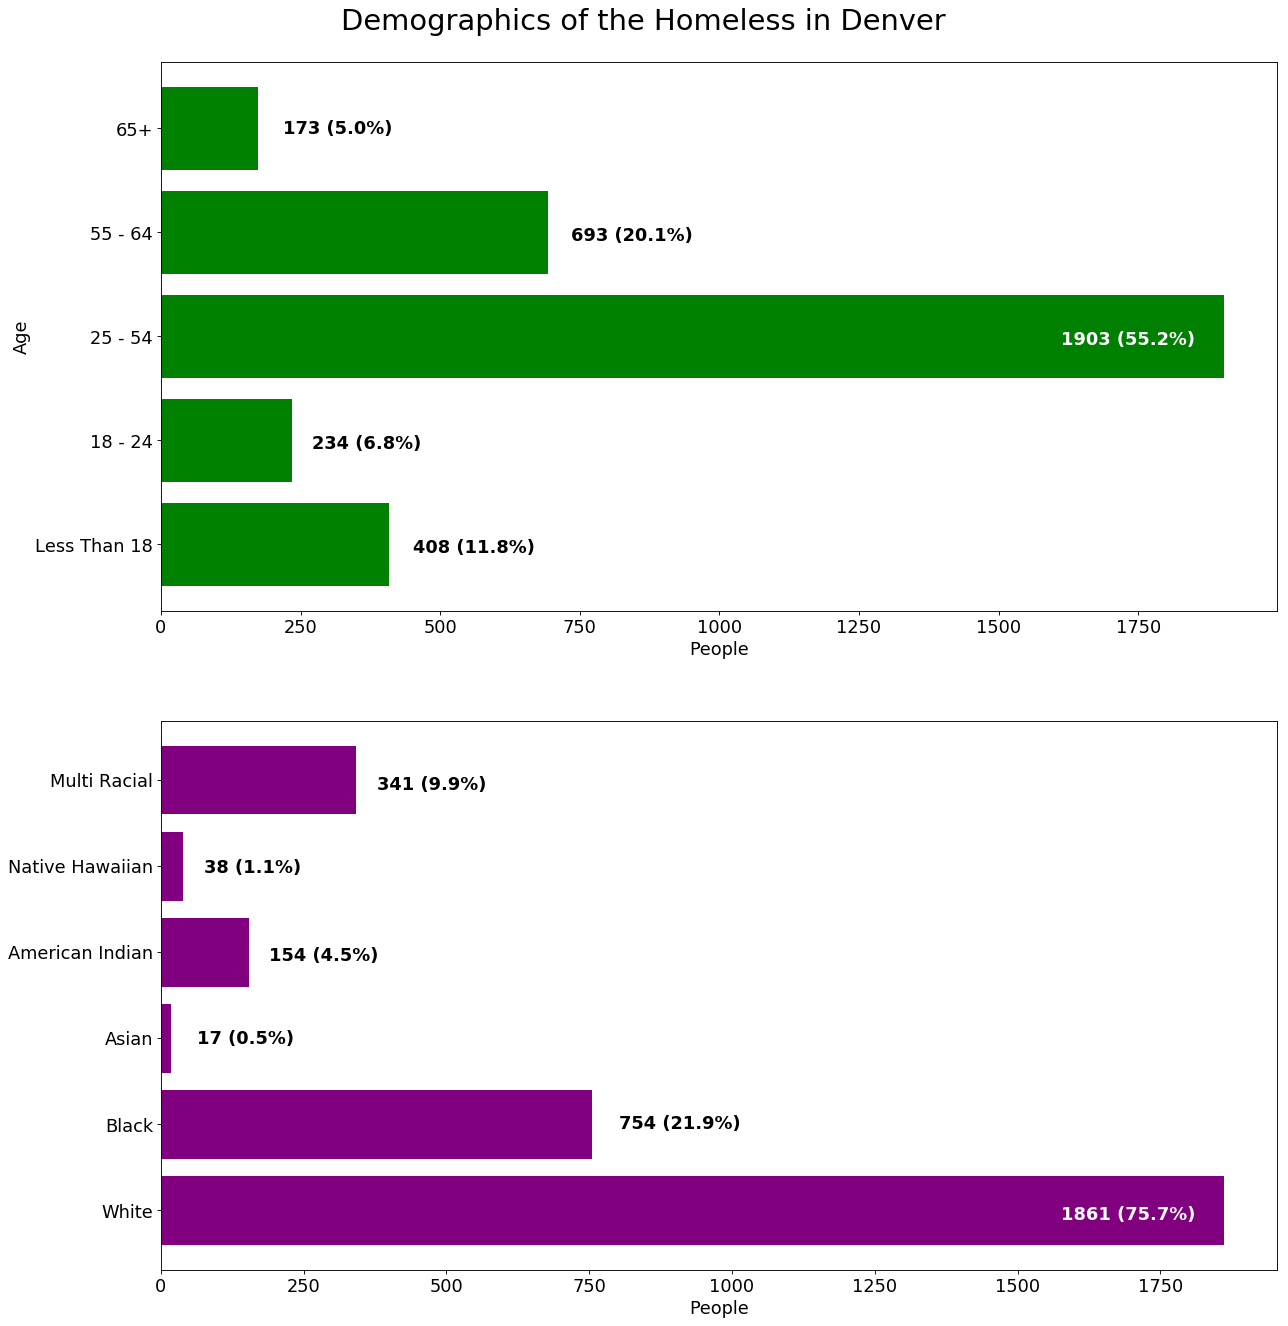

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def getData(fileName):
    graphData = []
    percentageData = []
    category = []
    data = open(fileName, "r")

    for line in data:
        word = line.split(' : ')
        value = word[1].split(' ')
        category.append(word[0])
        graphData.append(int(value[0]))
        percentageData.append(value[1])

    return graphData, percentageData, category

ageData, agePercentage, ageCategories = getData('AgeOfHomeless.txt')
raceData, racePercentage, raceCategories = getData('RaceOfHomeless.txt')

fig=plt.figure(figsize=(18, 20), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(2, 1, 1)
y3_pos = np.arange(len(ageData))

graph3 = plt.barh(y3_pos, ageData, align='center', color='green')
plt.yticks(y3_pos, ageCategories, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('People', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.figtext(0.25, 0.9, 'Demographics of the Homeless in Denver', fontsize=26)

plt.subplot(2, 1, 2)
y4_pos = np.arange(len(raceData))

graph4 = plt.barh(y4_pos, raceData, align='center', color='purple')
plt.yticks(y4_pos, raceCategories, fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('People', fontsize=16)

plt.figtext(0.3, 0.56, '{} {}'.format(ageData[0], agePercentage[0]), fontweight='bold', fontsize=16)
plt.figtext(0.23, 0.625, '{} {}'.format(ageData[1], agePercentage[1]), fontweight='bold', fontsize=16)
plt.figtext(0.75, 0.69, '{} {}'.format(ageData[2], agePercentage[2]), fontweight='bold', color='white', fontsize=16)
plt.figtext(0.41, 0.755, '{} {}'.format(ageData[3], agePercentage[3]), fontweight='bold', fontsize=16)
plt.figtext(0.21, 0.835, '{} {}'.format(ageData[4], agePercentage[4]), fontweight='bold', fontsize=16)
plt.figtext(0.75, 0.1435, '{} {}'.format(raceData[0], racePercentage[0]), fontweight='bold', color='white', fontsize=16)
plt.figtext(0.443, 0.2, '{} {}'.format(raceData[1], racePercentage[1]), fontweight='bold', fontsize=16)
plt.figtext(0.15, 0.253, '{} {}'.format(raceData[2], racePercentage[2]), fontweight='bold', fontsize=16)
plt.figtext(0.2, 0.305, '{} {}'.format(raceData[3], racePercentage[3]), fontweight='bold', fontsize=16)
plt.figtext(0.155, 0.36, '{} {}'.format(raceData[4], racePercentage[4]), fontweight='bold', fontsize=16)
plt.figtext(0.275, 0.425, '{} {}'.format(raceData[5], racePercentage[5]), fontweight='bold', fontsize=16)

plt.show()








Works Cited

“Colorado Homelessness Statistics.” Homeless in Colorado Statistics 2018.
    Homeless Estimation by State | US Interagency Council on Homelessness,
    www.usich.gov/homelessness-statistics/co/.
    
“Point in Time Reports.” MDHI, Metro Denver Homeless Initiative,
    www.mdhi.org/pit_reports.
